In [3]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
#!cp /content/plot_confusion_matrix.py /content/drive/My\ Drive/CIS508

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split

In [114]:
#Read training data file
trainfile = r'/gdrive/My Drive/CIS 508/Assignment 1/train.csv'
train = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/CIS 508/Assignment 1/test.csv'
test = pd.read_csv(testfile)

# Exploratory Data Analysis

In [113]:
train.head()
#print("=======")
#test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [15]:
train.info

<bound method DataFrame.info of            ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
0           1     2     23  ...                     0.0   39205.170000       0
1           3     2     34  ...                     0.0   49278.030000       0
2           4     2     23  ...                     0.0   67333.770000       0
3           8     2     37  ...                     0.0   64007.970000       0
4          10     2     39  ...                     0.0  117310.979016       0
...       ...   ...    ...  ...                     ...            ...     ...
76015  151829     2     48  ...                     0.0   60926.490000       0
76016  151830     2     39  ...                     0.0  118634.520000       0
76017  151835     2     23  ...                     0.0   74028.150000       0
76018  151836     2     25  ...                     0.0   84278.160000       0
76019  151838     2     46  ...                     0.0  117310.979016       0

[76020 rows x 371 c

In [16]:
test.info

<bound method DataFrame.info of            ID  var3  ...  saldo_medio_var44_ult3          var38
0           2     2  ...                     0.0   40532.100000
1           5     2  ...                     0.0   45486.720000
2           6     2  ...                     0.0   46993.950000
3           7     2  ...                     0.0  187898.610000
4           9     2  ...                     0.0   73649.730000
...       ...   ...  ...                     ...            ...
75813  151831     2  ...                     0.0   40243.200000
75814  151832     2  ...                     0.0  146961.300000
75815  151833     2  ...                     0.0  167299.770000
75816  151834     2  ...                     0.0  117310.979016
75817  151837     2  ...                     0.0  117310.979016

[75818 rows x 370 columns]>

In [17]:
#Data Description
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [18]:
# To check number of null values
train.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [19]:
#Copy Train data excluding target
X_Train = train.iloc[:, :-1].copy()
X_Test = test.copy()

#Select just Target Column
Y_Train = train.iloc[:, -1].copy()



In [20]:
#To get list of names of all Columns from a dataframe

TrainCols = list(X_Train.columns.values)
TestCols = list(X_Test.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

#Modeling Decision Tree - 0.55 Kaggle Score
###Default parameters

In [21]:
#Create Decision Tree Classifier
clf_2=DecisionTreeClassifier()

#Apply Classifier on Train and Target - train decision tree model
clf_2.fit(X_Train,Y_Train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# check accuracy on training set
clf_Pred_train = clf_2.predict(X_Train)
#Model Accuracy
print("TRAIN Accuracy:", accuracy_score(Y_Train,clf_Pred_train))

# check accuracy on test set
Y_Pred_test = clf_2.predict(X_Test)
#Model Accuracy on test set
#print("TEST Accuracy:", accuracy_score(clf_Pred_train,Y_Pred_test))

TRAIN Accuracy: 1.0


In [24]:
Y_Pred_test

array([0, 0, 0, ..., 1, 0, 0])

#Modeling Decision Tree - 0.50 Kaggle Score
###Changed max depth

In [29]:
#Create Decision Tree Classifier
clf_3=DecisionTreeClassifier(max_depth=10)

#Apply Classifier on Train and Target - train decision tree model
clf_3.fit(X_Train,Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# check accuracy on training set
clf_Pred_train = clf_3.predict(X_Train)
#Model Accuracy
print("TRAIN Accuracy:", accuracy_score(Y_Train,clf_Pred_train))

# check accuracy on test set
Y_Pred_test = clf_3.predict(X_Test)
#Model Accuracy on test set
#print("TEST Accuracy:", accuracy_score(clf_Pred_train,Y_Pred_test))

TRAIN Accuracy: 0.9627598000526177


In [31]:
Y_Pred_test

array([0, 0, 0, ..., 0, 0, 0])

#Modeling Decision Tree - 0.71 Kaggle Score
###Changed splitting criterion & max number of leaf nodes

In [54]:
#Create Decision Tree Classifier
clf_4=DecisionTreeClassifier(criterion='entropy', splitter='random', max_leaf_nodes=15, class_weight='balanced', max_depth=30, min_samples_split=20, min_impurity_decrease=1e-6)

#Apply Classifier on Train and Target - train decision tree model
clf_4.fit(X_Train,Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=30, max_features=None,
                       max_leaf_nodes=15, min_impurity_decrease=1e-06,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='random')

In [55]:
# check accuracy on training set
clf_Pred_train = clf_4.predict(X_Train)
#Model Accuracy
print("TRAIN Accuracy:", accuracy_score(Y_Train,clf_Pred_train))

# check accuracy on test set
Y_Pred_test = clf_4.predict(X_Test)
#Model Accuracy on test set
#print("TEST Accuracy:", accuracy_score(clf_Pred_train,Y_Pred_test))

TRAIN Accuracy: 0.7166798210997106


In [56]:
Y_Pred_test

array([0, 0, 0, ..., 0, 1, 0])

#Modeling Decision Tree - 0.73 Kaggle Score
###Best score with lower value parameters

In [115]:
#Create Decision Tree Classifier
clf_1=DecisionTreeClassifier(criterion='entropy', splitter='best', class_weight='balanced', max_depth=10, min_samples_split=10, min_impurity_decrease=1e-5)

#Apply Classifier on Train and Target - train decision tree model
clf_1.fit(X_Train,Y_Train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=1e-05,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [116]:
# check accuracy on training set
clf_Pred_train = clf_1.predict(X_Train)
#Model Accuracy
print("TRAIN Accuracy:", accuracy_score(Y_Train,clf_Pred_train))

# check accuracy on test set
Y_Pred_test = clf_1.predict(X_Test)
#Model Accuracy on test set
#print("TEST Accuracy:", accuracy_score(clf_Pred_train,Y_Pred_test))

TRAIN Accuracy: 0.7728229413312286


In [117]:
Y_Pred_test

array([1, 1, 0, ..., 0, 0, 0])

#Prediction Graphs



In [118]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(confusion_matrix(Y_Train, clf_Pred_train))
print()

#Print Classification Report
print('Printing the precision and recall, among other metrics')
print(classification_report(Y_Train,clf_Pred_train))


[[56180 16832]
 [  438  2570]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     73012
           1       0.13      0.85      0.23      3008

    accuracy                           0.77     76020
   macro avg       0.56      0.81      0.55     76020
weighted avg       0.96      0.77      0.84     76020



In [119]:
#Get Class Prediction probabilities as a data frame 
#Get Prediction Probability for the predicted class as a dataframe
#pred_Probability =pd.DataFrame(clf.predict_proba(X_Train))

#pred_Probability.head()

In [120]:
#Visualize decision tree
text_representation = tree.export_text(clf_1)
print(text_representation)

|--- feature_2 <= 26.50
|   |--- feature_329 <= 1.57
|   |   |--- feature_369 <= 118829.75
|   |   |   |--- feature_325 <= 1.50
|   |   |   |   |--- feature_369 <= 56980.39
|   |   |   |   |   |--- feature_327 <= 1.50
|   |   |   |   |   |   |--- feature_0 <= 9520.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  9520.00
|   |   |   |   |   |   |   |--- feature_278 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |   |   |   |--- feature_369 <= 35883.46
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_369 >  35883.46
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 28290.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  28290.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|  

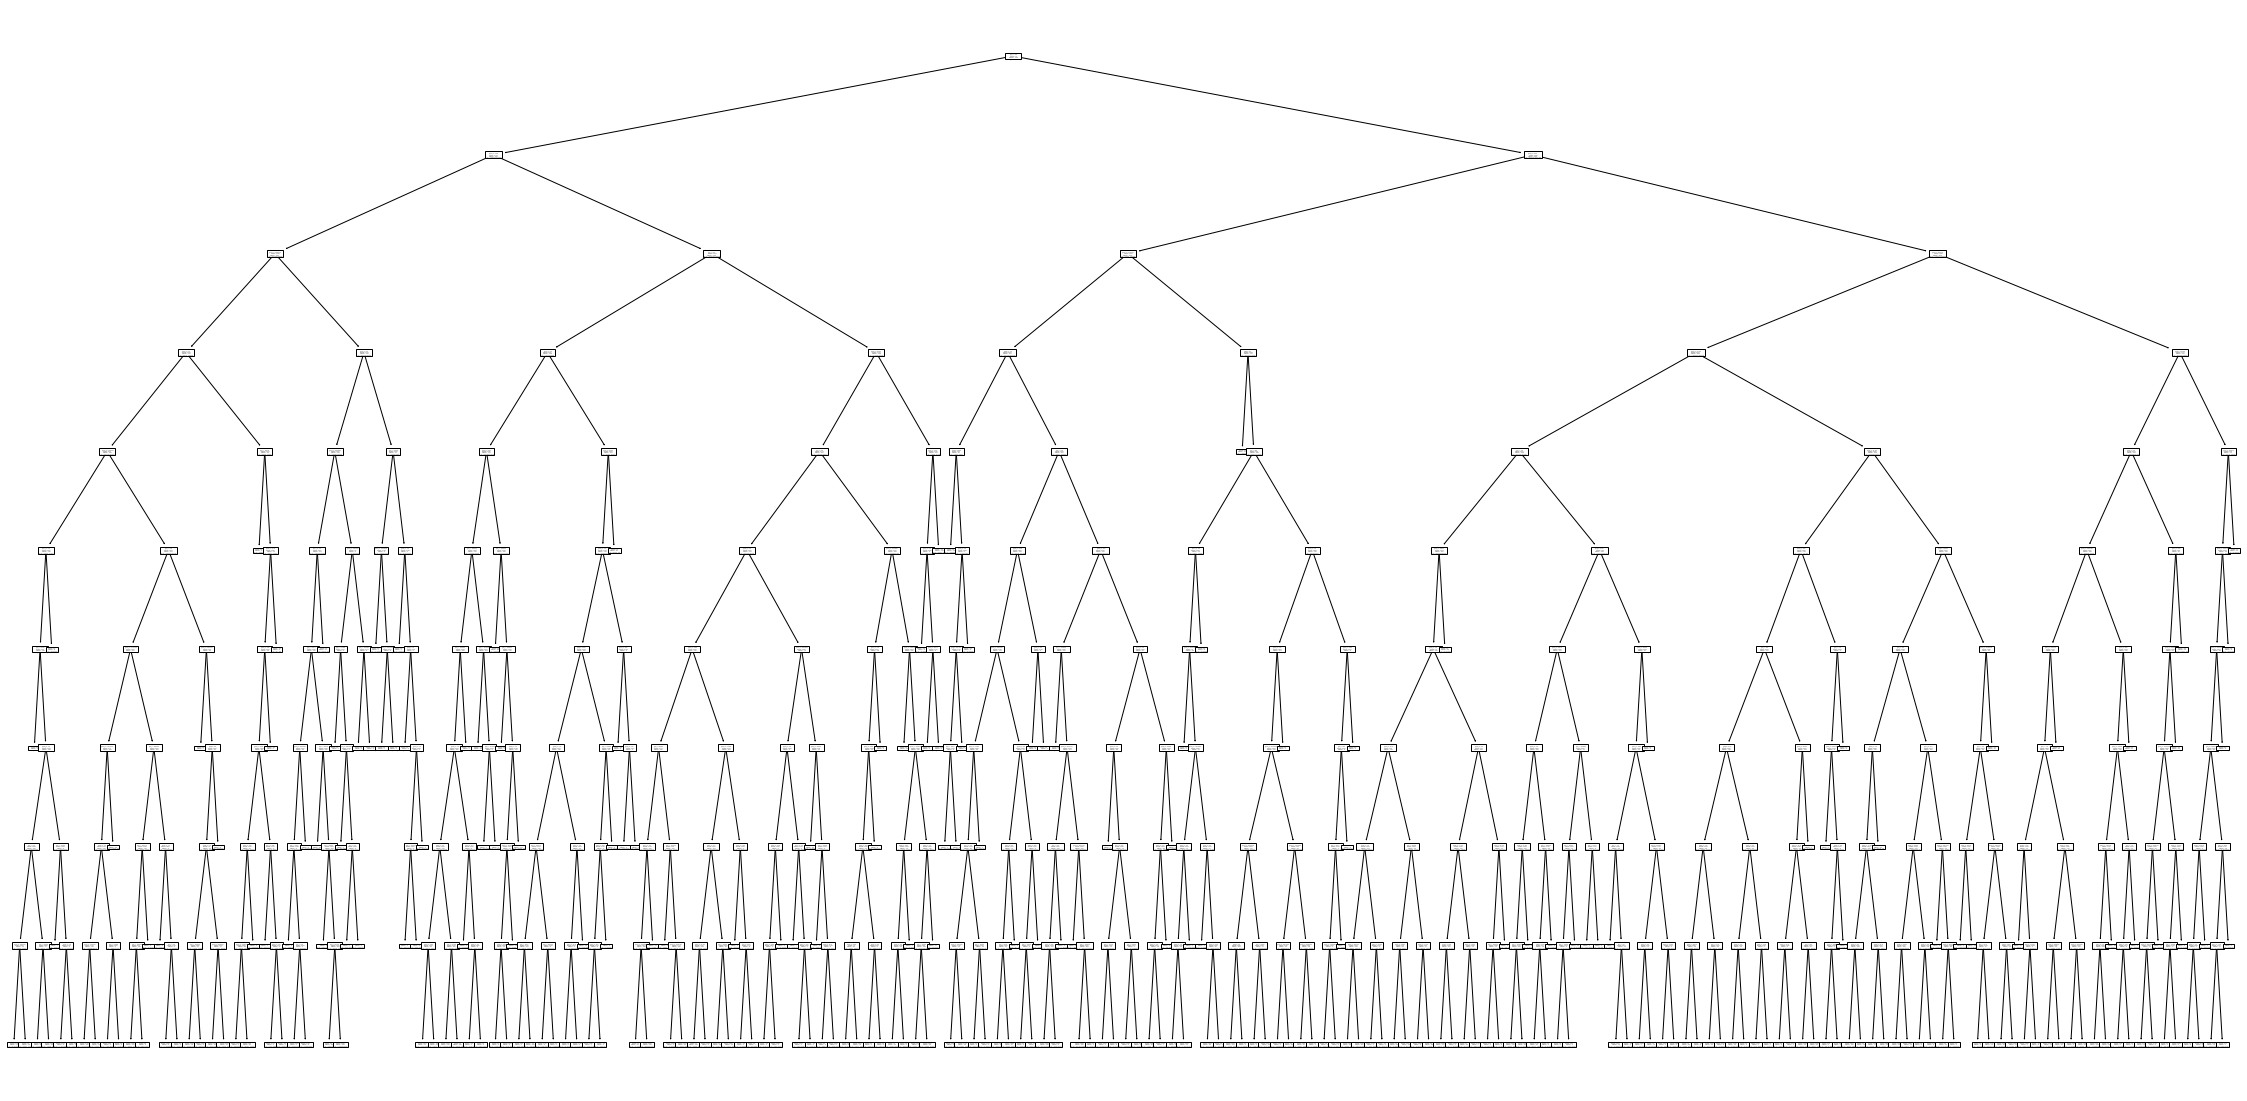

In [121]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf_1)


#Saves Results File


In [109]:
results=test['ID']

In [110]:
results_df=pd.DataFrame(results,columns=['ID'])
results_df['TARGET']=Y_Pred_test

In [111]:
print(results_df)

           ID  TARGET
0           2       1
1           5       1
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       1
75814  151832       0
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]


In [112]:
results_df.to_csv("/gdrive/My Drive/CIS 508/Assignment 1/results.csv", index = None)